# House Price Prediction

# Importing Important Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np

# Importing data from S3

In [124]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()
bucket='aws-glue-bucket-project'
data_key = 'housing_school_etl_output/housing_etl_output_11202022_v4.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

house_price=pd.read_csv(data_location)

In [126]:
house_price.head(2)

,zpid,imgsrc,hasimage,detailurl,statustext,price,unformattedprice,address,addressstreet,addresscity,...,has3dmodel,hasadditionalattributions,brokername,homeinfo_latitude,homeinfo_longitude,homeinfo_hometype,homeinfo_lotareavalue,homeinfo_lotareaunit,Avg School Rank,Sum School Enrollment
0,24756137,https://photos.zillowstatic.com/fp/2b6a5f8b4c4...,True,https://www.zillow.com/homedetails/5833-Ayala-...,House for sale,"$2,395,000",2696100,"5833 Ayala Ave, Oakland, CA 94609",5833 Ayala Ave,Oakland,...,False,False,Keller Williams Realty,37.844970,-122.257650,SINGLE_FAMILY,3920.4,sqft,1.0,662
1,24755454,https://photos.zillowstatic.com/fp/f58fbd092ac...,True,https://www.zillow.com/homedetails/5926-Dover-...,House for sale,"$1,975,000",2173700,"5926 Dover St, Oakland, CA 94609",5926 Dover St,Oakland,...,False,False,Keller Williams Realty,37.845116,-122.267914,SINGLE_FAMILY,5227.2,sqft,1.0,662


# EDA and Data Quality Report

In [4]:
house_price.shape

(6101, 28)

In [5]:
house_price.dtypes

zpid                           int64
imgsrc                        object
hasimage                        bool
detailurl                     object
statustext                    object
price                         object
unformattedprice               int64
address                       object
addressstreet                 object
addresscity                   object
addressstate                  object
addresszipcode                 int64
bed                            int64
bath                           int64
areacode                       int64
hasopenhouse                    bool
openhousedescription          object
Estimated yearly cost          int64
has3dmodel                      bool
hasadditionalattributions       bool
brokername                    object
homeinfo_latitude            float64
homeinfo_longitude           float64
homeinfo_hometype             object
homeinfo_lotareavalue        float64
homeinfo_lotareaunit          object
Avg School Rank              float64
S

In [6]:
house_price.corr()

,zpid,hasimage,unformattedprice,addresszipcode,bed,bath,areacode,hasopenhouse,Estimated yearly cost,has3dmodel,hasadditionalattributions,homeinfo_latitude,homeinfo_longitude,homeinfo_lotareavalue,Avg School Rank,Sum School Enrollment
zpid,1.000000,-0.014777,-0.002166,-0.061214,-0.223383,-0.179485,0.039589,-0.078369,-0.169333,-0.075680,0.139285,-0.474186,0.474751,0.034569,0.025849,-0.094789
hasimage,-0.014777,1.000000,0.013663,0.017703,0.031729,0.024508,0.001680,-0.004139,0.005138,0.024427,0.010245,0.008058,-0.009251,0.002168,0.026257,0.011146
unformattedprice,-0.002166,0.013663,1.000000,-0.207719,0.192388,0.388107,0.047493,0.040617,0.751126,0.091453,0.083238,0.013454,-0.023763,-0.000984,0.249842,-0.084912
addresszipcode,-0.061214,0.017703,-0.207719,1.000000,0.038539,-0.033332,-0.006315,-0.115508,-0.163980,-0.090128,-0.239104,-0.008975,0.030219,-0.001954,-0.061664,0.155422
bed,-0.223383,0.031729,0.192388,0.038539,1.000000,0.701329,-0.029025,0.080170,0.234405,0.096182,-0.051780,0.128752,-0.129807,-0.028302,0.035442,0.033473
bath,-0.179485,0.024508,0.388107,-0.033332,0.701329,1.000000,-0.024511,0.103846,0.381628,0.121705,0.023673,0.104593,-0.105580,-0.013610,0.131405,0.016782
areacode,0.039589,0.001680,0.047493,-0.006315,-0.029025,-0.024511,1.000000,-0.008119,-0.007970,-0.005954,-0.009106,-0.003294,0.003438,0.009357,0.007856,-0.002873
hasopenhouse,-0.078369,-0.004139,0.040617,-0.115508,0.080170,0.103846,-0.008119,1.000000,0.080124,0.182776,0.013014,0.032283,-0.041405,-0.010385,0.154815,-0.066243
Estimated yearly cost,-0.169333,0.005138,0.751126,-0.163980,0.234405,0.381628,-0.007970,0.080124,1.000000,0.133123,-0.021581,0.082393,-0.094188,-0.006983,0.230413,-0.054455
has3dmodel,-0.075680,0.024427,0.091453,-0.090128,0.096182,0.121705,-0.005954,0.182776,0.133123,1.000000,-0.014178,0.036877,-0.045646,-0.001259,0.131343,-0.056605


In [7]:
# Data Quality Report for Numerical columns
df_cont = house_price[['bed', 'bath','homeinfo_lotareavalue','unformattedprice','Avg School Rank','Sum School Enrollment']].copy()

data_types = pd.DataFrame(df_cont.dtypes,
                          columns=['Data Type'])

total_count = pd.DataFrame(df_cont.count(),
                                   columns=['Count'])

percentage_missing = pd.DataFrame(df_cont.isnull().sum()/len(df_cont)*100,
                                   columns=['%Miss'])

cardinality = pd.DataFrame(columns=['Cardinality'])
for v in list(df_cont.columns.values):
    cardinality.loc[v] = [df_cont[v].nunique()]
    
minimum = pd.DataFrame(columns=['Min'])
for v in list(df_cont.columns.values):
    minimum.loc[v] = [df_cont[v].min()]
    
first_quartile = pd.DataFrame(columns=['1st Qrt'])
for v in list(df_cont.columns.values):
    first_quartile.loc[v] = [df_cont[v].quantile(0.25)]
    
mean = pd.DataFrame(columns=['Mean'])
for v in list(df_cont.columns.values):
    mean.loc[v] = [df_cont[v].mean()]
    
median = pd.DataFrame(columns=['Median'])
for v in list(df_cont.columns.values):
    median.loc[v] = [df_cont[v].median()]
    
third_quartile = pd.DataFrame(columns=['3rd Qrt'])
for v in list(df_cont.columns.values):
    third_quartile.loc[v] = [df_cont[v].quantile(0.75)]
    
maximum = pd.DataFrame(columns=['Max'])
for v in list(df_cont.columns.values):
    maximum.loc[v] = [df_cont[v].max()]
    
stddev = pd.DataFrame(columns=['Std_Dev'])
for v in list(df_cont.columns.values):
    stddev.loc[v] = [df_cont[v].std()]

In [8]:
data_quality_report = data_types.join(total_count).join(percentage_missing).join(cardinality).join(minimum).join(first_quartile).join(mean).join(median).join(third_quartile).join(maximum).join(stddev)
print("\nData Quality Report")
print("Total records: {}".format(len(data_quality_report.index)))
data_quality_report.round(2)


Data Quality Report
Total records: 6


,Data Type,Count,%Miss,Cardinality,Min,1st Qrt,Mean,Median,3rd Qrt,Max,Std_Dev
bed,int64,6101,0.0,16,0,2.0,3.16,3.00,4.0,15,1.62
bath,int64,6101,0.0,14,0,2.0,2.28,2.00,3.0,18,1.38
homeinfo_lotareavalue,float64,6101,0.0,2373,1.0,4500.0,956841.43,6198.59,9100.0,3800000000.0,49435288.76
unformattedprice,int64,6101,0.0,4166,2000,539950.0,1312750.82,799007.00,1416034.0,50139536,2136480.08
Avg School Rank,float64,6101,0.0,68,1.0,3.5,5.44,5.30,7.2,10.0,2.17
Sum School Enrollment,int64,6101,0.0,163,20,2681.0,5497.22,4695.00,7706.0,14376,3507.91


# Data Preparation for Modelling

### Subsetting to get only fields that are relevant to build a model 

In [9]:
house_price=house_price[['bed','bath','has3dmodel','hasadditionalattributions','homeinfo_hometype','homeinfo_lotareavalue','statustext','unformattedprice','Avg School Rank','Sum School Enrollment','Estimated yearly cost']]
house_price.head(2)

,bed,bath,has3dmodel,hasadditionalattributions,homeinfo_hometype,homeinfo_lotareavalue,statustext,unformattedprice,Avg School Rank,Sum School Enrollment,Estimated yearly cost
0,4,4,False,False,SINGLE_FAMILY,3920.4,House for sale,2696100,1.0,662,2696100
1,4,3,False,False,SINGLE_FAMILY,5227.2,House for sale,2173700,1.0,662,2173700


In [10]:
# Adding a relevant attribute
house_price['price_per_sqft'] = house_price['unformattedprice']/house_price['homeinfo_lotareavalue']
min(house_price['price_per_sqft']),max(house_price['price_per_sqft'])

(0.00020921052631578946, 1195000.0)

In [12]:
# Data Cleaning to remove nulls and zeros
house_price=house_price[house_price['unformattedprice']!=0]
house_price=house_price[house_price['homeinfo_lotareavalue']!=0]
len(house_price)

6101

Matplotlib is building the font cache; this may take a moment.


array([[<AxesSubplot:title={'center':'bed'}>,
        <AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'homeinfo_lotareavalue'}>],
       [<AxesSubplot:title={'center':'unformattedprice'}>,
        <AxesSubplot:title={'center':'Avg School Rank'}>,
        <AxesSubplot:title={'center':'Sum School Enrollment'}>],
       [<AxesSubplot:title={'center':'Estimated yearly cost'}>,
        <AxesSubplot:title={'center':'price_per_sqft'}>, <AxesSubplot:>]],
      dtype=object)

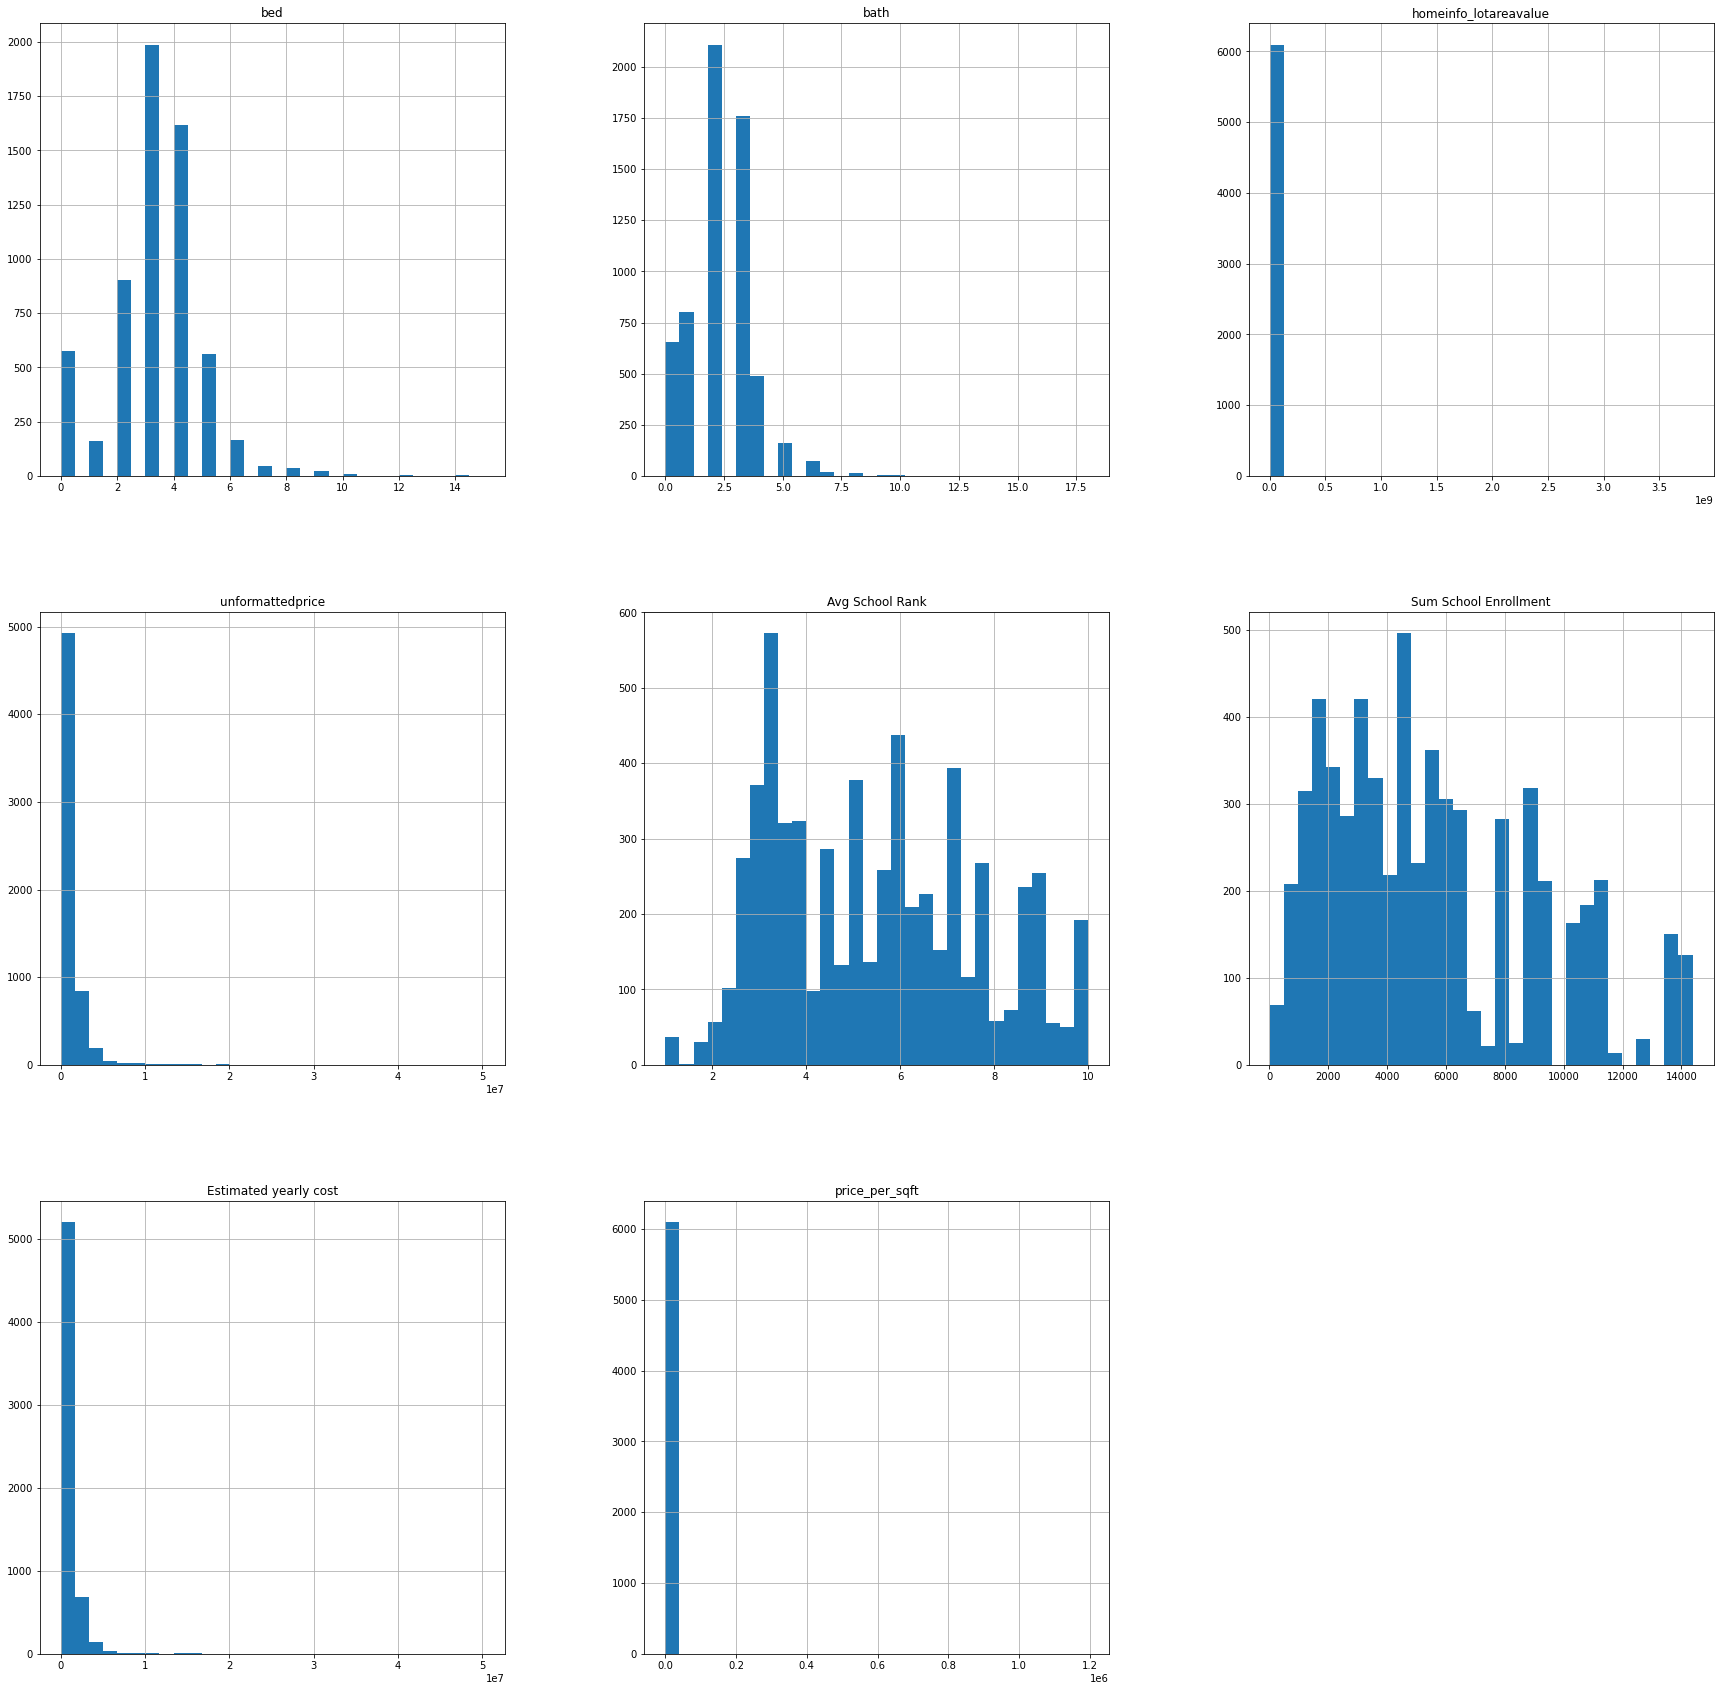

In [14]:
# Checking the distribution
house_price.hist(bins=30,figsize=(30,30))

## Normalization

In [13]:
df_cont=house_price[['bed','bath','homeinfo_lotareavalue','price_per_sqft','Avg School Rank','Sum School Enrollment','Estimated yearly cost']]
for i in list(df_cont.columns):
    house_price[i]=(house_price[i]-house_price[i].min())/(house_price[i].max()-house_price[i].min())

In [14]:
house_price.head(2)

,bed,bath,has3dmodel,hasadditionalattributions,homeinfo_hometype,homeinfo_lotareavalue,statustext,unformattedprice,Avg School Rank,Sum School Enrollment,Estimated yearly cost,price_per_sqft
0,0.266667,0.222222,False,False,SINGLE_FAMILY,0.000001,House for sale,2696100,0.0,0.04472,0.053772,0.000575
1,0.266667,0.166667,False,False,SINGLE_FAMILY,0.000001,House for sale,2173700,0.0,0.04472,0.043353,0.000348


### Renaming columns

In [15]:
house_price.rename(columns={'unformattedprice':'Price','homeinfo_lotareavalue':'area'},inplace=True)

### Making relevant transformation to categorical fields

In [16]:
house_price=pd.get_dummies(house_price, columns=['hasadditionalattributions','homeinfo_hometype','has3dmodel'])

In [17]:
house_price.head(2)

,bed,bath,area,statustext,Price,Avg School Rank,Sum School Enrollment,Estimated yearly cost,price_per_sqft,hasadditionalattributions_False,hasadditionalattributions_True,homeinfo_hometype_APARTMENT,homeinfo_hometype_CONDO,homeinfo_hometype_LOT,homeinfo_hometype_MANUFACTURED,homeinfo_hometype_MULTI_FAMILY,homeinfo_hometype_SINGLE_FAMILY,homeinfo_hometype_TOWNHOUSE,has3dmodel_False,has3dmodel_True
0,0.266667,0.222222,0.000001,House for sale,2696100,0.0,0.04472,0.053772,0.000575,1,0,0,0,0,0,0,1,0,1,0
1,0.266667,0.166667,0.000001,House for sale,2173700,0.0,0.04472,0.043353,0.000348,1,0,0,0,0,0,0,1,0,1,0


### Selecting relevant columns post categorical and required transformations and create independent and dependent fields

In [18]:
house_price.columns

Index(['bed', 'bath', 'area', 'statustext', 'Price', 'Avg School Rank',
       'Sum School Enrollment', 'Estimated yearly cost', 'price_per_sqft',
       'hasadditionalattributions_False', 'hasadditionalattributions_True',
       'homeinfo_hometype_APARTMENT', 'homeinfo_hometype_CONDO',
       'homeinfo_hometype_LOT', 'homeinfo_hometype_MANUFACTURED',
       'homeinfo_hometype_MULTI_FAMILY', 'homeinfo_hometype_SINGLE_FAMILY',
       'homeinfo_hometype_TOWNHOUSE', 'has3dmodel_False', 'has3dmodel_True'],
      dtype='object')

In [84]:
X=house_price[['bed', 'bath', 
        'hasadditionalattributions_True',
       'homeinfo_hometype_APARTMENT', 'homeinfo_hometype_CONDO',
       'homeinfo_hometype_LOT', 'homeinfo_hometype_MANUFACTURED',
               'has3dmodel_False','price_per_sqft','Avg School Rank','Sum School Enrollment','Estimated yearly cost']]
y=house_price[['Price']]

In [85]:
X=X.values
y=y.values

In [86]:
X=X.astype('float32')
y=y.reshape(-1).astype('float32')

### Split data into train and test

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(4270, 12) (4270,)
(1831, 12) (1831,)


# Model Implementation

In [34]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(ytest, ypred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(ytest, ypred), 2)) 
print("Root Mean squared error =", round(np.sqrt(sm.mean_squared_error(ytest, ypred)), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(ytest, ypred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(ytest, ypred), 2)) 
print("R2 score =", round(sm.r2_score(ytest, ypred), 2))
print("Adjusted R2=",round(1 - (1-linear_reg.score(xtest, ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1),2))

Mean absolute error = 497357.85
Mean squared error = 1916950670887.6
Root Mean squared error = 1384539.88
Median absolute error = 290115.6
Explain variance score = 0.6
R2 score = 0.6
Adjusted R2= 0.59


# Sagemaker codes

In [40]:
import sagemaker
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri 
from sagemaker.session import s3_input, Session
from sagemaker import LinearLearner
import numpy as np

#Create a SageMaker session
sagemaker_session = sagemaker.Session()
bucket = "aws-glue-bucket-project"
prefix = "sagemaker" #prefix is a sub-folder/key within the S3 bucket

In [41]:
#Access SageMaker role created prior to session
#Need to pass role to training job
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::098960867156:role/service-role/AmazonSageMaker-ExecutionRole-20221114T120462


In [42]:
output='s3://aws-glue-bucket-project/output/'

In [89]:
linear=LinearLearner(role=role,
                    instance_count=1,
                    instance_type='ml.m4.xlarge',
                    predictor_type='regressor',
                    output_path=output,
                    sagemaker_session=sagemaker_session,
                    epochs=300,
                    num_models=32,
                    loss='absolute_loss',
                    use_spot_instances=True,
                    max_run=300,
                    max_wait=600)

In [90]:
# Training the model
formatted_train_data=linear.record_set(xtrain, labels=ytrain)

In [91]:
formatted_validation_data=linear.record_set(xtest, labels=ytest,channel='validation')

In [92]:
# Fitting the model
linear.fit([formatted_train_data, formatted_validation_data])

2022-11-20 21:53:39 Starting - Starting the training job...
2022-11-20 21:54:05 Starting - Preparing the instances for trainingProfilerReport-1668981219: InProgress
..................
2022-11-20 21:57:06 Downloading - Downloading input data......
2022-11-20 21:58:06 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/20/2022 21:57:57 INFO 140622195136320] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin':

In [ ]:
# Deploying the model which will create end points

In [93]:
linear_regressor=linear.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

-----------------------------------!

In [ ]:
# Price prediction

In [96]:
from sagemaker.predictor import csv_serializer, json_deserializer

linear_regressor.ContentType='text/csv'
linear_regressor.serializer=csv_serializer
linear_regressor.deserializer=json_deserializer

In [98]:
# Predicting house prices
result = linear_regressor.predict(xtest)
result #should be a JSON

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 785859.5},
  {'score': 533883.875},
  {'score': 1105915.0},
  {'score': 452262.875},
  {'score': 1042985.6875},
  {'score': 796153.9375},
  {'score': 937891.1875},
  {'score': 639688.8125},
  {'score': 1195897.375},
  {'score': 31928.578125},
  {'score': 880505.5625},
  {'score': 1632725.25},
  {'score': 186471.1875},
  {'score': 1076099.25},
  {'score': 118576.7578125},
  {'score': 1679965.0},
  {'score': 1156241.625},
  {'score': 346415.0625},
  {'score': 86331.515625},
  {'score': 499811.4375},
  {'score': 663855.0},
  {'score': 626603.25},
  {'score': 433355.59375},
  {'score': 470708.0},
  {'score': 2931114.5},
  {'score': 1577784.375},
  {'score': 1023677.5625},
  {'score': 2321739.5},
  {'score': 303627.3125},
  {'score': 443385.0},
  {'score': 1858178.625},
  {'score': 378909.0},
  {'score': 518637.0},
  {'score': 34418.8515625},
  {'score': 360781.53125},
  {'score': 563164.5},
  {'score': 388316.5},
  {'score': 336642.4375},
  {'score': 606607.875},

Matplotlib is building the font cache; this may take a moment.


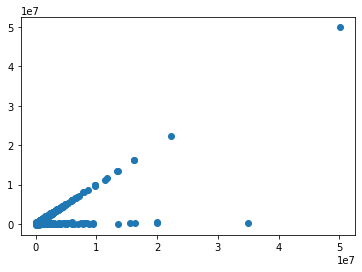

In [100]:
import matplotlib.pyplot as plt

#Iterate the result JSON to get an NP array of all the predictions so we can compare to Y test
predictions = np.array([res['score'] for res in result['predictions']])
predictions #should now be an numpy array

#Visualize how accurate predictions are relative to y_test
plt.scatter(ytest, predictions)

In [103]:
# Model Evaluation
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(ytest, predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(ytest, predictions), 2)) 
print("Root Mean squared error =", round(np.sqrt(sm.mean_squared_error(ytest, predictions)), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(ytest, predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(ytest, predictions), 2)) 
print("R2 score =", round(sm.r2_score(ytest, predictions), 2))
# print("Adjusted R2=",round(1 - (1-linear_regressor.score(xtest, ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1),2))

Mean absolute error = 347257.87
Mean squared error = 2179697336667.53
Root Mean squared error = 1476379.81
Median absolute error = 52535.75
Explain variance score = 0.56
R2 score = 0.54


In [129]:
k = xtest.shape[1]
n = len(xtest)
r2=sm.r2_score(ytest, predictions)
adj_r2 = 1-(1-r2*(n-1)/(n-k-1))
print('Adjusted R2=',round(adj_r2,2))

Adjusted R2= 0.54


# Creating a dataframe of test set with predictions

In [113]:
final=pd.DataFrame(xtest,columns=['bed', 'bath','hasadditionalattributions_True','homeinfo_hometype_APARTMENT', 'homeinfo_hometype_CONDO',
       'homeinfo_hometype_LOT', 'homeinfo_hometype_MANUFACTURED','has3dmodel_False'
               ,'price_per_sqft','Avg School Rank','Sum School Enrollment','Estimated yearly cost'])
final['prediction']=predictions

In [116]:
final.head(2)

,bed,bath,hasadditionalattributions_True,homeinfo_hometype_APARTMENT,homeinfo_hometype_CONDO,homeinfo_hometype_LOT,homeinfo_hometype_MANUFACTURED,has3dmodel_False,price_per_sqft,Avg School Rank,Sum School Enrollment,Estimated yearly cost,prediction
0,0.2,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,0.000059,0.444444,0.064154,0.013588,785859.500
1,0.2,0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.000094,0.400000,0.603232,0.011149,533883.875


# Writing back the predictions to S3

In [122]:
from io import StringIO # python3; python2: BytesIO 
import boto3

bucket = 'aws-glue-bucket-project' # already created on S3
csv_buffer = StringIO()
final.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'output/predictions.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'CQFN0327A0RP1HBH',
  'HostId': 's81923LYcrkBz0r2OF+VwRQnKp1zITEGhoHUyYr9rIiJGyI34K7wQ4RKraQR6bljXSCG95A3ayw=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 's81923LYcrkBz0r2OF+VwRQnKp1zITEGhoHUyYr9rIiJGyI34K7wQ4RKraQR6bljXSCG95A3ayw=',
   'x-amz-request-id': 'CQFN0327A0RP1HBH',
   'date': 'Sun, 20 Nov 2022 22:51:43 GMT',
   'etag': '"242d013678026d1b4ad0ade36d1920db"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"242d013678026d1b4ad0ade36d1920db"'}

# Cleaning up the resources

In [130]:
sagemaker.Session().delete_endpoint(linear.endpoint)

AttributeError: 'LinearLearner' object has no attribute 'endpoint'

In [ ]:
# Delete the endpoint and underlying model
linear.delete_model() 
linear.delete_endpoint()
for t in preprocessor_transformers:
    t.delete_model()

In [ ]:
#Delete the IAM Role
iam_client.detach_role_policy(
    PolicyArn=policy_arn,
    RoleName=role_name
)
iam_client.delete_role(RoleName=role_name)

In [104]:
#Delete the IAM Policy
iam_client.delete_policy(PolicyArn=policy_arn)

In [131]:
my_region = boto3.session.Session().region_name

In [132]:
# Create a low-level SageMaker service client.
sagemaker_client = boto3.client('sagemaker', region_name=my_region)

# Delete endpoint
sagemaker_client.delete_endpoint(EndpointName='linear-learner-2022-11-20-21-59-48-535')

{'ResponseMetadata': {'RequestId': 'bdc478db-1cb0-4417-843e-c4c90b1bfd2f',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'bdc478db-1cb0-4417-843e-c4c90b1bfd2f',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 20 Nov 2022 23:17:07 GMT'},
  'RetryAttempts': 0}}

In [133]:
# Delete endpoint configuration
sagemaker_client.delete_endpoint_config(EndpointConfigName='linear-learner-2022-11-20-21-59-48-535')

{'ResponseMetadata': {'RequestId': 'bb237902-a924-47a3-aec8-3c1143febfd2',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'bb237902-a924-47a3-aec8-3c1143febfd2',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 20 Nov 2022 23:18:38 GMT'},
  'RetryAttempts': 0}}

In [134]:
# Delete model
sagemaker_client.delete_model(ModelName='linear-learner-2022-11-20-21-59-48-535')

{'ResponseMetadata': {'RequestId': 'ed972f88-557e-43fa-be58-94e63c7b9cde',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'ed972f88-557e-43fa-be58-94e63c7b9cde',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 20 Nov 2022 23:19:18 GMT'},
  'RetryAttempts': 0}}